# Complete Script for Analyzing Movie Data
##### Christoph Schartner and Aaron Riegel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
results_path = '../Data/result_df.csv'
movies_path = '../Data/movies_df.csv'
results = pd.read_csv(results_path)
movies = pd.read_csv(movies_path)

In [3]:
movies = pd.read_csv(movies_path)
results = pd.read_csv(results_path)

In [4]:
final = pd.merge(movies, results, left_index=True, right_index=True)

### Final DataFrame with Combined Data

In [5]:
final.head()

,id,title,release_date,overview,Family,Animation,History,Documentary,Adventure,Western,...,pizza,sink,remote,bus,horse,surfboard,book,keyboard,diningtable,sports ball
0,299537,Captain Marvel,2019-03-06,The story follows Carol Danvers as she becomes...,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,As Hiccup fulfills his dream of creating a pea...,1,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,399579,Alita: Battle Angel,2019-01-31,When Alita awakens with no memory of who she i...,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,450001,Master Z: Ip Man Legacy,2018-12-20,"After being defeated by Ip Man, Cheung Tin Chi...",0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,Gellert Grindelwald has escaped imprisonment a...,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


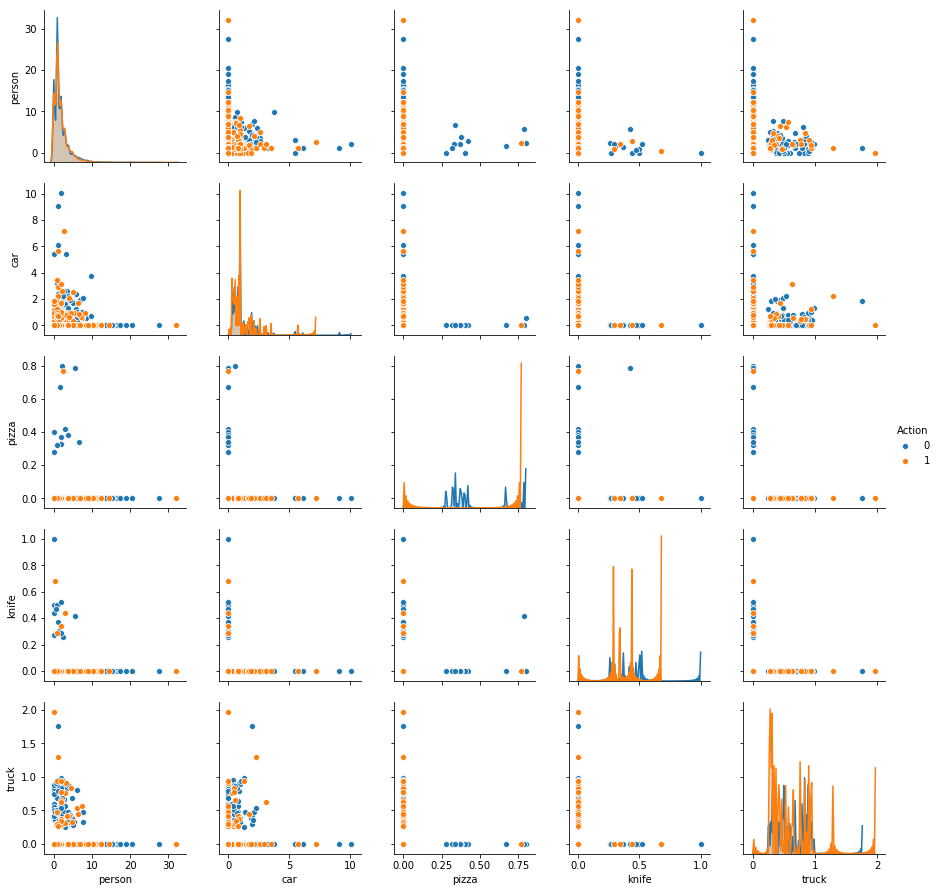

In [6]:
pair = sns.pairplot(final.drop(['title'],axis=1), vars = ['person','car', 'pizza','knife','truck'], hue= 'Action')

In [7]:
genre_df = final[['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']]

In [8]:
gct = pd.DataFrame(genre_df.apply(pd.Series.value_counts).loc[1].transpose())

In [9]:
gct = gct.reset_index()
gct.columns
gct.columns = ['genres', 'count']
gct.sort_values(by='count', ascending=False, inplace=True)

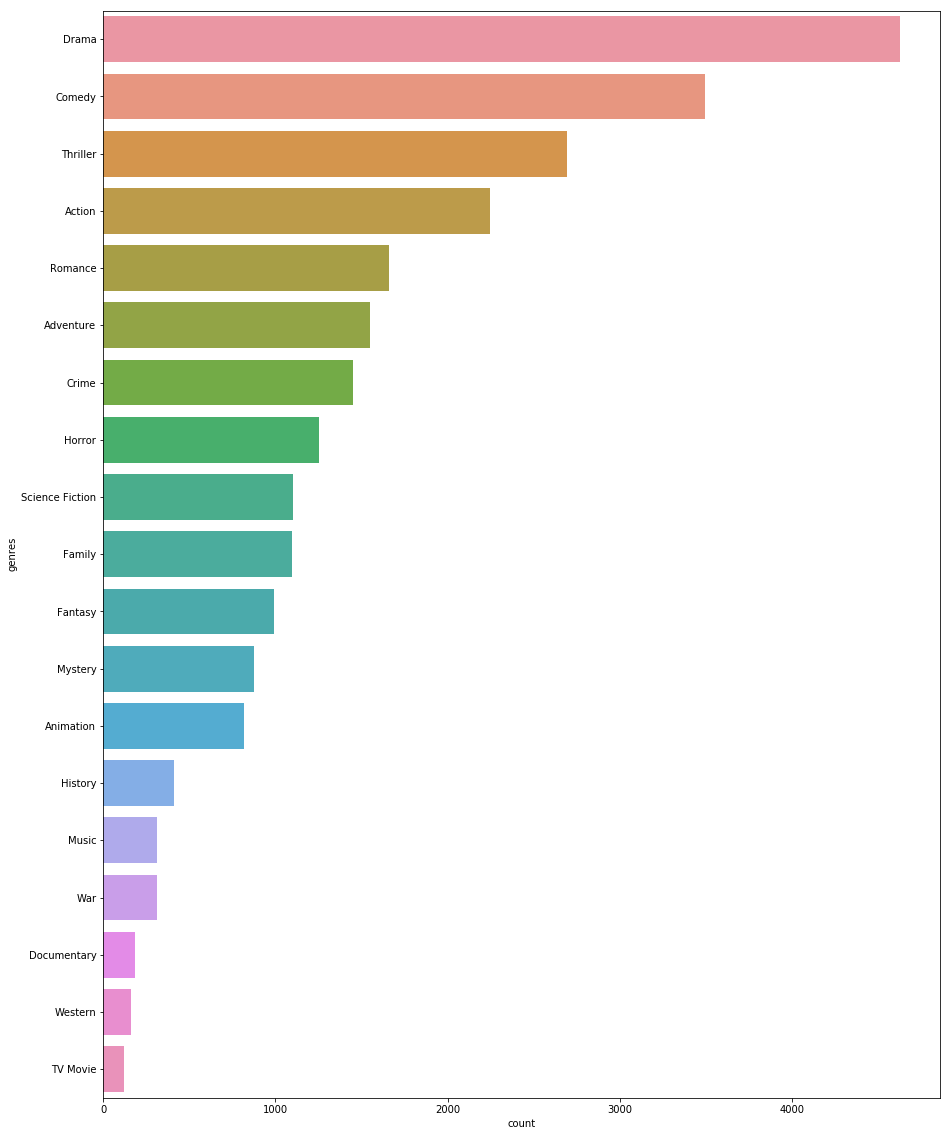

In [10]:
plt.figure(figsize=(15,20)) 
sns.barplot(x='count',y ='genres', data=gct)

## YOLO Data Approach

In [11]:
y = final.drop(final[['id','title']], axis = 1)
y = y[['Mystery', 'Animation', 'Music', 'History', 'Comedy', 'Science Fiction',
       'Family', 'Fantasy', 'Romance', 'Horror', 'War', 'Documentary',
       'TV Movie', 'Adventure', 'Drama', 'Western', 'Thriller', 'Action',
       'Crime']]

In [12]:
X = final.drop(final[['Mystery', 'Animation', 'Music', 'History', 'Comedy', 'Science Fiction',
       'Family', 'Fantasy', 'Romance', 'Horror', 'War', 'Documentary',
       'TV Movie', 'Adventure', 'Drama', 'Western', 'Thriller', 'Action',
       'Crime','overview','release_date']], axis = 1)
X = X.drop(X[['title','id']], axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.svm import SVC

In [16]:
from sklearn.multiclass import OneVsRestClassifier

In [17]:
model = OneVsRestClassifier(SVC(gamma='auto'))

In [18]:
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [19]:
predicted = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(f'{classification_report(y_test,predicted)}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.00      0.00      0.00       273
           2       0.00      0.00      0.00        95
           3       0.00      0.00      0.00       142
           4       0.35      0.11      0.17      1132
           5       0.22      0.02      0.04       367
           6       0.00      0.00      0.00       353
           7       0.13      0.01      0.01       332
           8       0.16      0.01      0.02       569
           9       0.11      0.01      0.02       393
          10       0.00      0.00      0.00       106
          11       0.00      0.00      0.00        51
          12       0.00      0.00      0.00        31
          13       0.24      0.03      0.05       511
          14       0.46      0.25      0.32      1540
          15       0.00      0.00      0.00        60
          16       0.27      0.05      0.08       900
          17       0.32    

### Word2Vec Approach

In [22]:
movies_path = '../Data/movies_df.csv'

In [23]:
movies = pd.read_csv(movies_path)

In [24]:
movies.columns

Index(['id', 'title', 'release_date', 'overview', 'Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music'],
      dtype='object')

In [25]:
movies = movies.drop(['release_date'], axis=1)

In [26]:
movies = movies.drop(['overview'],axis=1)

In [27]:
from gensim.models import Word2Vec

In [28]:
from gensim.models import KeyedVectors

In [31]:
filename = '../Data/GoogleNews-vectors-negative300.bin'

In [32]:
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [33]:
stoplist = set('for a of the and to in : &'.split())
punctuation = set('; / " . , :'.split())

In [34]:
def most_likely(title, genres = ['Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime']):
    
    broken_title = title.split(' ')

    print(broken_title)
    dists = []
    d = [0] * len(genres)
    for word in broken_title:
        if word.lower() in stoplist:
            continue
        
        else:
            for stop in punctuation:
                if stop in word:
                    word = word.split(stop)[0]
                
            for genre in genres:
                d[genres.index(genre)] += model.distance(word.lower(), genre)
            
    dists = [x / len(broken_title) for x in d]
    
    
    print(sorted(zip(dists,genres), reverse = False)[:3])



In [35]:
genres = ['Mystery',
       'Animation', 'Music', 'History', 'Comedy', 'Science', 'Family',
       'Fantasy', 'Romance', 'Horror', 'War', 'Documentary', 'TV',
       'Adventure', 'Drama', 'Western', 'Thriller', 'Action', 'Crime']
most_likely('how to train your dragon:', genres)

['how', 'to', 'train', 'your', 'dragon:']
[(0.7306259445053478, 'Animation'), (0.7323483993429456, 'Horror'), (0.7340412899392667, 'Fantasy')]


### TF-IDF Approach

In [36]:
import re
import nltk

In [37]:
df = pd.read_csv('../Data/movies_df.csv')

In [38]:
def clean(text): # use regular expression to remove specific characters
    text = re.sub("\'", " ", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [39]:
df['clean_overview'] = df['overview'].astype(str).apply(lambda x: clean(x))

In [40]:
stpwrds = set(nltk.corpus.stopwords.words('english'))

In [41]:
def remove_stops(text):
    cleaned = [w for w in text.split() if not w in stpwrds]
    return ' '.join(cleaned)

In [42]:
df['clean_overview'] = df['clean_overview'].astype(str).apply(lambda x: remove_stops(x))

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [44]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [45]:
X = df['clean_overview']
y = df[['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

tfidf_xtrain = tfidf_vectorizer.fit_transform(X_train)
tfidf_xtest = tfidf_vectorizer.transform(X_test)

In [47]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [48]:
model = OneVsRestClassifier(SVC(gamma = 'auto',kernel = 'linear'))

In [49]:
model.fit(tfidf_xtrain, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [50]:
predictions = model.predict(tfidf_xtest)

In [51]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.24      0.81      0.37       106
           1       0.19      0.88      0.31        59
           2       0.03      0.57      0.05         7
           3       0.16      0.80      0.26        10
           4       0.23      0.68      0.34       173
           5       0.03      1.00      0.06         2
           6       0.29      0.70      0.41       193
           7       0.63      0.67      0.65      1456
           8       0.37      0.77      0.50       190
           9       0.29      0.85      0.43       124
          10       0.30      0.67      0.41       250
          11       0.24      0.81      0.36        31
          12       0.06      0.74      0.12        23
          13       0.14      0.76      0.24        63
          14       0.43      0.75      0.55       445
          15       0.00      0.00      0.00         0
          16       0.40      0.69      0.51       520
          17       0.54    

#### Use Multilabel Binarizer Instead

In [52]:
def make_genre_list(s):
    genre_list = ['Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music']
    gen = []
    for g in genre_list:
        if s.loc[g] == 1:
            gen.append(g)
    return gen

In [53]:
df['genre_list'] = df.apply(lambda row : make_genre_list(row), axis = 1)

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer

In [55]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['genre_list'])

X = df['clean_overview']
y = multilabel_binarizer.transform(df['genre_list'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tfidf_xtrain = tfidf_vectorizer.fit_transform(X_train)
tfidf_xtest = tfidf_vectorizer.transform(X_test)

In [57]:
model = OneVsRestClassifier(SVC(gamma = 'auto', kernel = 'linear'))

In [58]:
model.fit(tfidf_xtrain, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [59]:
predictions = model.predict(tfidf_xtest)

In [60]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55       445
           1       0.23      0.68      0.34       173
           2       0.19      0.88      0.31        59
           3       0.54      0.68      0.60       888
           4       0.29      0.70      0.41       193
           5       0.16      0.80      0.26        10
           6       0.63      0.67      0.65      1456
           7       0.24      0.81      0.37       106
           8       0.14      0.76      0.24        63
           9       0.03      0.57      0.05         7
          10       0.37      0.77      0.50       190
          11       0.08      0.67      0.15        12
          12       0.06      0.74      0.12        23
          13       0.30      0.67      0.41       250
          14       0.29      0.85      0.43       124
          15       0.00      0.00      0.00         0
          16       0.40      0.69      0.51       520
          17       0.24    

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logovr = OneVsRestClassifier(LogisticRegression())

In [63]:
logovr.fit(tfidf_xtrain, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [64]:
predicted = logovr.predict(tfidf_xtest)

In [65]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.24      0.85      0.37       217
           1       0.09      0.77      0.16        61
           2       0.01      1.00      0.02         3
           3       0.40      0.74      0.52       605
           4       0.12      0.69      0.21        85
           5       0.00      0.00      0.00         0
           6       0.62      0.69      0.65      1372
           7       0.04      1.00      0.08        15
           8       0.03      1.00      0.06        11
           9       0.00      0.00      0.00         1
          10       0.10      0.97      0.18        40
          11       0.00      0.00      0.00         0
          12       0.01      1.00      0.02         3
          13       0.14      0.81      0.24       100
          14       0.13      0.96      0.23        49
          15       0.00      0.00      0.00         0
          16       0.24      0.78      0.37       274
          17       0.03    

In [68]:
mbi = multilabel_binarizer.inverse_transform(predicted)

## Dominant color approach

In [72]:
from matplotlib import image
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
from timeit import default_timer as timer

def get_dominant_color(id):
    start = timer()
    img = image.imread(r'../Data/Images/' + str(id) + '.jpg')
    np_img = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))
    np_flat_img = whiten(np_img)
    cluster_centers, distortion = kmeans(np_flat_img, 2)
    
    red_std = np_img[:, 0].std()
    green_std = np_img[:, 1].std()
    blue_std =  np_img[:, 0].std()
    
    results = {}
    for index, cluster_center in enumerate(cluster_centers):
        int_color = int('{:02x}{:02x}{:02x}'.format(
            int(cluster_center[0] * red_std), 
            int(cluster_center[1] * green_std), 
            int(cluster_center[2] * blue_std)), 16)
        key = 'color_{}'.format(index)
        results[key] = int_color
    end = timer()
    print('{0}: {1:.2f}s'.format(id, end - start))
    return results
    

In [73]:
movies = pd.read_csv(r'../Data/movies_df.csv')

In [74]:
temp = movies[:25].apply(lambda x: get_dominant_color(x['id']), axis=1, result_type='expand')

299537: 1.04s
166428: 1.40s
399579: 2.13s
450001: 1.34s
338952: 1.04s
324857: 0.95s
400650: 1.09s
464504: 0.68s
297802: 1.41s
512196: 0.58s
450465: 0.86s
490132: 1.07s
428078: 0.93s
299536: 1.40s
920: 1.49s
487297: 0.88s
280217: 1.44s
480530: 1.11s
424694: 0.98s
449563: 1.35s
390634: 1.34s
245891: 1.69s
458723: 0.63s
445629: 1.23s
332562: 1.13s


In [75]:
df = pd.merge(movies, temp, left_index=True, right_index=True, )

In [76]:
df.head()

,id,title,release_date,overview,Family,Animation,History,Documentary,Adventure,Western,...,War,Mystery,Fantasy,Action,TV Movie,Thriller,Comedy,Music,color_0,color_1
0,299537,Captain Marvel,2019-03-06,The story follows Carol Danvers as she becomes...,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,5907000,13742804
1,166428,How to Train Your Dragon: The Hidden World,2019-01-03,As Hiccup fulfills his dream of creating a pea...,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,6794913,1716028
2,399579,Alita: Battle Angel,2019-01-31,When Alita awakens with no memory of who she i...,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1717349,10595056
3,450001,Master Z: Ip Man Legacy,2018-12-20,"After being defeated by Ip Man, Cheung Tin Chi...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1315347,8682373
4,338952,Fantastic Beasts: The Crimes of Grindelwald,2018-11-14,Gellert Grindelwald has escaped imprisonment a...,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1646884,9543582


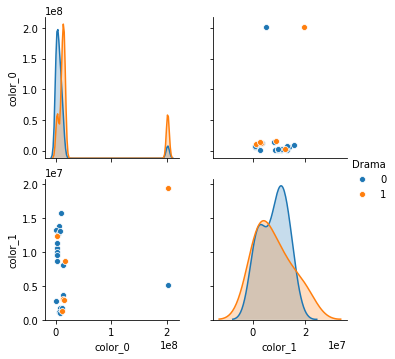

In [77]:
sns.pairplot(df, vars=['color_0', 'color_1'], hue='Drama')

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
df.columns

Index(['id', 'title', 'release_date', 'overview', 'Family', 'Animation',
       'History', 'Documentary', 'Adventure', 'Western', 'Crime', 'Drama',
       'Horror', 'Science Fiction', 'Romance', 'War', 'Mystery', 'Fantasy',
       'Action', 'TV Movie', 'Thriller', 'Comedy', 'Music', 'color_0',
       'color_1'],
      dtype='object')

In [80]:
df.describe()

,id,Family,Animation,History,Documentary,Adventure,Western,Crime,Drama,Horror,...,War,Mystery,Fantasy,Action,TV Movie,Thriller,Comedy,Music,color_0,color_1
count,25.000000,25.000000,25.000000,25.0,25.0,25.000000,25.0,25.0,25.00000,25.000000,...,25.0,25.000000,25.0,25.0,25.0,25.00000,25.0,25.000000,2.500000e+01,2.500000e+01
mean,372775.080000,0.200000,0.200000,0.0,0.0,0.440000,0.0,0.0,0.24000,0.080000,...,0.0,0.080000,0.4,0.4,0.0,0.24000,0.4,0.080000,2.233030e+07,8.041947e+06
std,117515.667261,0.408248,0.408248,0.0,0.0,0.506623,0.0,0.0,0.43589,0.276887,...,0.0,0.276887,0.5,0.5,0.0,0.43589,0.5,0.276887,5.433783e+07,5.263254e+06
min,920.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,7.275700e+05,1.049354e+06
25%,299537.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,2.301226e+06,2.894372e+06
50%,400650.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,6.794913e+06,8.729728e+06
75%,450465.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,1.0,1.0,0.0,0.00000,1.0,0.000000,1.268884e+07,1.230172e+07
max,512196.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.00000,1.000000,...,0.0,1.000000,1.0,1.0,0.0,1.00000,1.0,1.000000,2.022363e+08,1.941533e+07


In [81]:
y = df[['Action']]
X = df[['color_0', 'color_1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [82]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(gamma='auto'))
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=None)

In [83]:
predictions = model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         3

   micro avg       0.62      0.62      0.62         8
   macro avg       0.31      0.50      0.38         8
weighted avg       0.39      0.62      0.48         8

